In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import json

# Styling
color_pal = sns.color_palette("Set2")
plt.style.use('seaborn-v0_8-colorblind')

# Warnings control
import warnings
warnings.filterwarnings('ignore')

In [2]:
from transformers import pipeline

In [3]:
import torch
# import tensorflow

In [5]:
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis", device = -1)

RuntimeError: Failed to import transformers.models.roberta.modeling_tf_roberta because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [6]:
price_path = Path('./price/INTC.csv')
tweet_path = Path('./tweet/INTC/')

In [7]:
price = pd.read_csv(price_path, header=0)
price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,25.030001,25.059999,24.270000,24.420000,20.711935,40688000
1,2012-09-05,24.400000,24.780001,24.190001,24.389999,20.686487,38595800
2,2012-09-06,24.469999,25.100000,24.459999,25.100000,21.288677,40187600
3,2012-09-07,24.129999,24.700001,24.010000,24.190001,20.516853,86282100
4,2012-09-10,23.950001,24.600000,23.170000,23.260000,19.728077,80584600


In [10]:
price.set_index('Date', inplace=True)
price.index = pd.to_datetime(price.index)

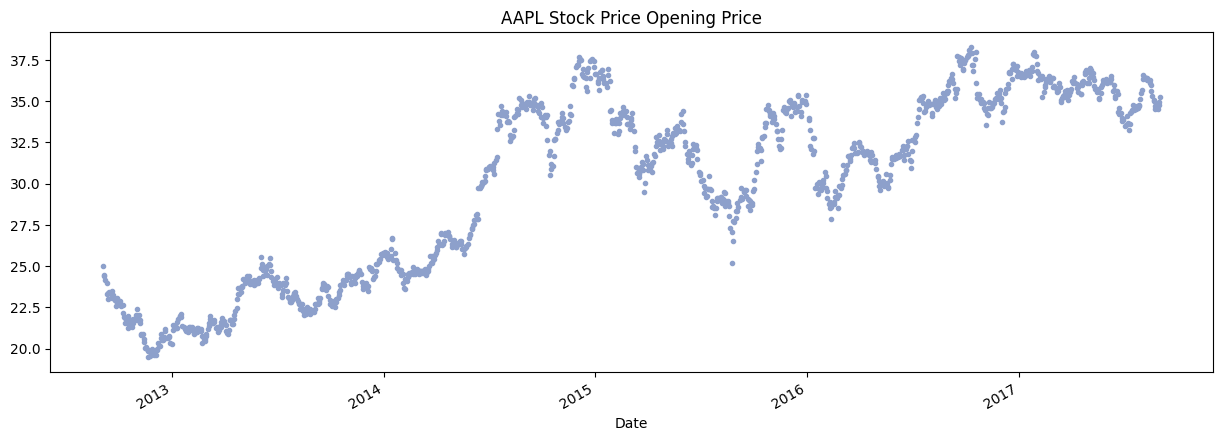

In [11]:
price["Open"].plot(title='AAPL Stock Price Opening Price',
        style='.',
        figsize=(15,5),
        use_index=True,
        color=color_pal[2])
plt.show()

In [8]:
day = '2014-01-01'
file_path = tweet_path / day

In [9]:
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
tweet_df = pd.DataFrame(data)
tweet_df

,text,created_at,user_id_str
0,"[2013, wrap-up, and, trading, set, review, -, ...",Wed Jan 01 10:52:20 +0000 2014,23059499
1,"[dow, stocks, trend, $, axp, $, utx, $, csco, ...",Wed Jan 01 00:00:48 +0000 2014,567452784


In [ ]:
" ".join(tweet_df['text'].iloc[0])

In [29]:
sentiment_pipeline(" ".join(tweet_df['text'].iloc[0]))

NameError: name 'sentiment_pipeline' is not defined